In [1]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import normalize

# Sample data

In [2]:
df1 = pd.read_csv('../data/raw/sample/driving_log.csv')

In [3]:
columns = df1.columns

In [4]:
df1_count = len(df1)
df1_count

8036

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 7 columns):
center      8036 non-null object
left        8036 non-null object
right       8036 non-null object
steering    8036 non-null float64
throttle    8036 non-null float64
brake       8036 non-null float64
speed       8036 non-null float64
dtypes: float64(4), object(3)
memory usage: 439.5+ KB


In [6]:
df1.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [7]:
df1_summary = df1.describe().transpose()
df1_summary_cols = df1_summary.index
print(df1_summary_cols)
df1_summary

Index(['steering', 'throttle', 'brake', 'speed'], dtype='object')


,count,mean,std,min,25%,50%,75%,max
steering,8036.0,0.004070,0.128840,-0.942695,0.000000,0.000000,0.000000,1.000000
throttle,8036.0,0.869660,0.301326,0.000000,0.985533,0.985533,0.985533,0.985533
brake,8036.0,0.001970,0.036565,0.000000,0.000000,0.000000,0.000000,1.000000
speed,8036.0,28.169839,6.149327,0.502490,30.183093,30.186400,30.186640,30.709360


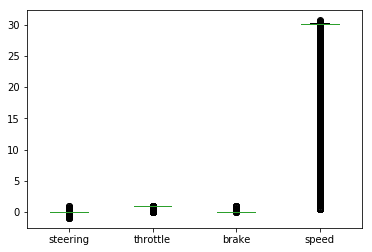

In [8]:
df1.plot(kind='box')

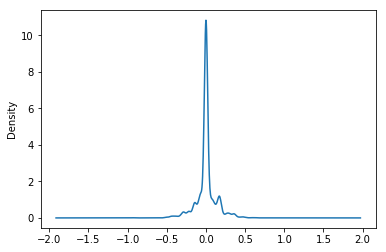

In [10]:
df1['steering'].plot(kind='kde')

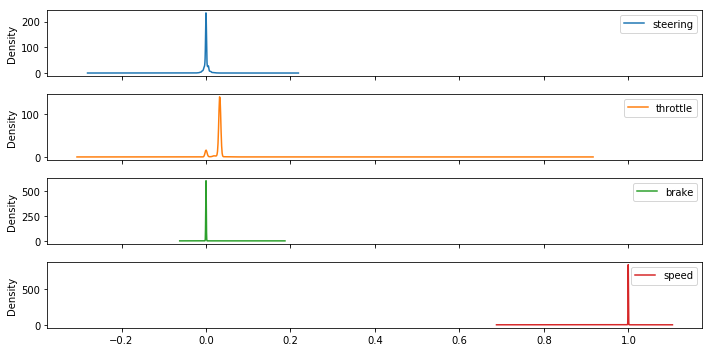

In [9]:
# normalise data
df1_norm = normalize(df1[df1_summary_cols][:])

# put into dataframe for easy charting
df1_norm = pd.DataFrame(df1_norm, columns=df1_summary_cols)

# drop columns with zero mean and zero std.dev
df1_norm = df1_norm.loc[:, (df1_norm.mean() != 0.) & (df1_norm.std() != 0.)]

# plot kde
df1_norm.plot(kind='kde', 
              subplots=True, 
              figsize=(10, 5))
plt.tight_layout()

# Sim Track 1: Direction = Default

In [10]:
df2 = pd.read_csv('../data/raw/sim_track_1_direction_default/driving_log.csv', 
                  header=None, 
                  names=columns)

In [11]:
df2_count = len(df2)
df2_count

2719

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 7 columns):
center      2719 non-null object
left        2719 non-null object
right       2719 non-null object
steering    2719 non-null float64
throttle    2719 non-null float64
brake       2719 non-null int64
speed       2719 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 148.8+ KB


In [13]:
df2.head()

,center,left,right,steering,throttle,brake,speed
0,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,-0.00442,0.4,0,21.89313
1,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,-0.00442,0.4,0,21.99177
2,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,-0.00442,0.4,0,22.40355
3,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,-0.00442,0.4,0,22.54704
4,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,-0.00442,0.4,0,22.89278


In [14]:
print(df2['center'][0])

/home/adrian/repos/udacity_carnd/project_3/data/raw/sim_track_1_direction_default/IMG/center_2017_05_18_01_26_04_409.jpg


In [15]:
!pwd

/src/repos/udacity_carnd/project_3/notebooks


In [16]:
df2_summary = df2.describe().transpose()
df2_summary_cols = df2_summary.index
print(df2_summary_cols)
df2_summary

Index(['steering', 'throttle', 'brake', 'speed'], dtype='object')


,count,mean,std,min,25%,50%,75%,max
steering,2719.0,-0.037111,7.937210e-02,-0.366861,-0.07072,-0.03094,-0.00884,0.296141
throttle,2719.0,0.400000,5.552136e-17,0.400000,0.40000,0.40000,0.40000,0.400000
brake,2719.0,0.000000,0.000000e+00,0.000000,0.00000,0.00000,0.00000,0.000000
speed,2719.0,29.983366,5.398903e-01,21.893130,30.03805,30.03831,30.03837,30.489870


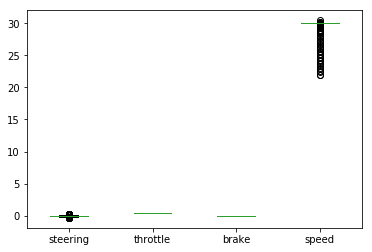

In [17]:
df2.plot(kind='box')

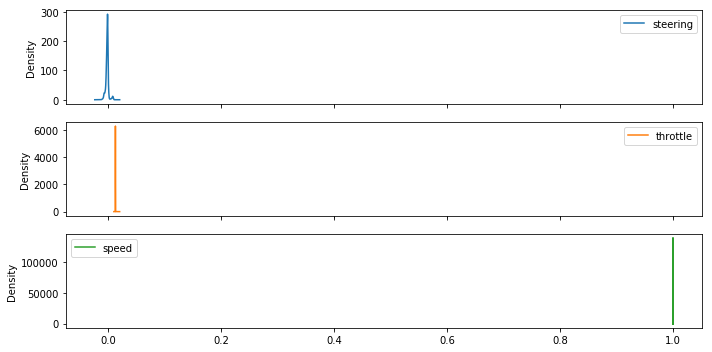

In [18]:
# normalise data
df2_norm = normalize(df2[df2_summary_cols][:])

# put into dataframe for easy charting
df2_norm = pd.DataFrame(df2_norm, columns=df2_summary_cols)

# drop columns with zero mean and zero std.dev
df2_norm = df2_norm.loc[:, (df2_norm.mean() != 0.) & (df2_norm.std() != 0.)]

# plot kde
df2_norm.plot(kind='kde', 
              subplots=True, 
              figsize=(10, 5))
plt.tight_layout()

# Sim Track 1: Direction=Reverse

In [19]:
df3 = pd.read_csv('../data/raw/sim_track_1_direction_reverse/driving_log.csv', 
                  header=None, 
                  names=columns)

In [20]:
df3_count = len(df3)
df3_count

2568

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2568 entries, 0 to 2567
Data columns (total 7 columns):
center      2568 non-null object
left        2568 non-null object
right       2568 non-null object
steering    2568 non-null float64
throttle    2568 non-null float64
brake       2568 non-null int64
speed       2568 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 140.5+ KB


In [22]:
df3.head()

,center,left,right,steering,throttle,brake,speed
0,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.01768,0.4,0,22.05317
1,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.01768,0.4,0,22.16373
2,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.01768,0.4,0,22.55709
3,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.01768,0.4,0,22.71801
4,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.00884,0.4,0,23.04240


In [23]:
df3_summary = df3.describe().transpose()
df3_summary_cols = df3_summary.index
print(df3_summary_cols)
df3_summary

Index(['steering', 'throttle', 'brake', 'speed'], dtype='object')


,count,mean,std,min,25%,50%,75%,max
steering,2568.0,0.033004,7.972712e-02,-0.358021,0.00442,0.02652,0.06630,0.335921
throttle,2568.0,0.400000,1.110439e-16,0.400000,0.40000,0.40000,0.40000,0.400000
brake,2568.0,0.000000,0.000000e+00,0.000000,0.00000,0.00000,0.00000,0.000000
speed,2568.0,29.981615,5.410350e-01,22.053170,30.03819,30.03835,30.03838,30.344190


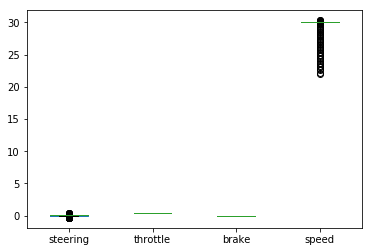

In [24]:
df3.plot(kind='box')

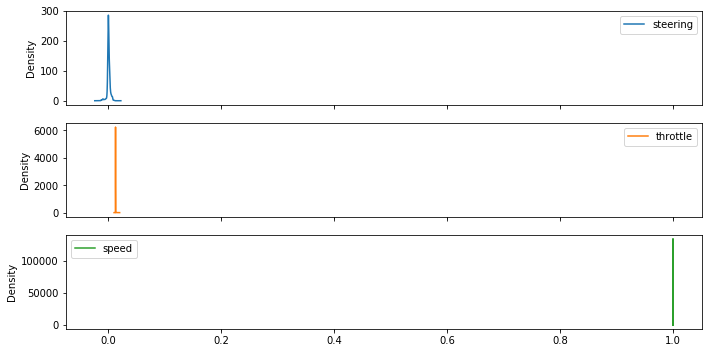

In [25]:
# normalise data
df3_norm = normalize(df3[df3_summary_cols][:])

# put into dataframe for easy charting
df3_norm = pd.DataFrame(df3_norm, columns=df3_summary_cols)

# drop columns with zero mean and zero std.dev
df3_norm = df3_norm.loc[:, (df3_norm.mean() != 0.) & (df3_norm.std() != 0.)]

# plot kde
df3_norm.plot(kind='kde', 
              subplots=True, 
              figsize=(10, 5))
plt.tight_layout()

## Sim Track 2: Direction=Default

In [26]:
df4 = pd.read_csv('../data/raw/sim_track_2_direction_default/driving_log.csv', 
                  header=None, 
                  names=columns)

In [27]:
df4_count = len(df3)
df4_count

2568

In [28]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 7 columns):
center      1892 non-null object
left        1892 non-null object
right       1892 non-null object
steering    1892 non-null float64
throttle    1892 non-null float64
brake       1892 non-null float64
speed       1892 non-null float64
dtypes: float64(4), object(3)
memory usage: 103.5+ KB


In [29]:
df4.head()

,center,left,right,steering,throttle,brake,speed
0,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.0,0.0,0.0,5.104989
1,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.0,0.0,0.0,5.053757
2,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.0,0.0,0.0,5.003038
3,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.0,0.0,0.0,4.952826
4,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,0.0,0.0,0.0,4.903121


In [30]:
df4_summary = df4.describe().transpose()
df4_summary_cols = df4_summary.index
print(df4_summary_cols)
df4_summary

Index(['steering', 'throttle', 'brake', 'speed'], dtype='object')


,count,mean,std,min,25%,50%,75%,max
steering,1892.0,-0.002504,0.373451,-0.919362,-0.274041,0.00000,0.304981,0.976823
throttle,1892.0,0.214573,0.325870,0.000000,0.000000,0.00000,0.396757,1.000000
brake,1892.0,0.010536,0.077585,0.000000,0.000000,0.00000,0.000000,0.899623
speed,1892.0,18.851647,3.496073,4.801353,16.486313,18.70069,21.247120,29.226190


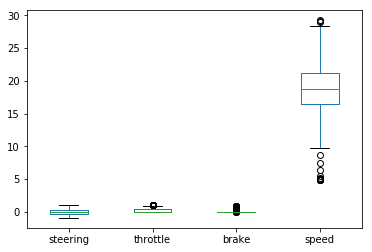

In [31]:
df4.plot(kind='box')

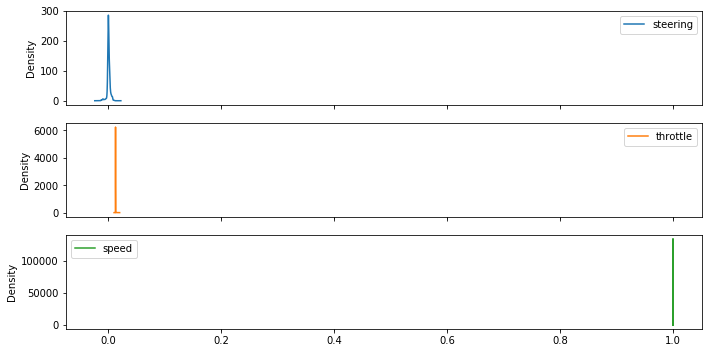

In [32]:
# normalise data
df4_norm = normalize(df4[df4_summary_cols][:])

# put into dataframe for easy charting
df4_norm = pd.DataFrame(df4_norm, columns=df4_summary_cols)

# drop columns with zero mean and zero std.dev
df4_norm = df3_norm.loc[:, (df4_norm.mean() != 0.) & (df4_norm.std() != 0.)]

# plot kde
df4_norm.plot(kind='kde', 
              subplots=True, 
              figsize=(10, 5))
plt.tight_layout()

## Sim Track 2: Direction=Reverse

In [33]:
df5 = pd.read_csv('../data/raw/sim_track_2_direction_reverse/driving_log.csv', 
                  header=None, 
                  names=columns)

In [34]:
df5_count = len(df5)
df5_count

1412

In [35]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 7 columns):
center      1412 non-null object
left        1412 non-null object
right       1412 non-null object
steering    1412 non-null float64
throttle    1412 non-null float64
brake       1412 non-null float64
speed       1412 non-null float64
dtypes: float64(4), object(3)
memory usage: 77.3+ KB


In [36]:
df5.head()

,center,left,right,steering,throttle,brake,speed
0,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,-0.00442,0.0,0.0,5.568658
1,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,-0.00442,0.0,0.0,5.375051
2,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,-0.00442,0.0,0.0,4.923551
3,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,-0.00442,0.0,0.0,4.642110
4,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,/home/adrian/repos/udacity_carnd/project_3/dat...,-0.00884,0.0,0.0,4.699109


In [37]:
df5_summary = df5.describe().transpose()
df5_summary_cols = df5_summary.index
print(df5_summary_cols)
df5_summary

Index(['steering', 'throttle', 'brake', 'speed'], dtype='object')


,count,mean,std,min,25%,50%,75%,max
steering,1412.0,0.015294,0.362561,-0.897262,-0.247521,-0.004420,0.243101,1.0000
throttle,1412.0,0.387864,0.423225,0.000000,0.000000,0.199036,0.899443,1.0000
brake,1412.0,0.009480,0.089355,0.000000,0.000000,0.000000,0.000000,1.0000
speed,1412.0,25.577544,4.556767,4.642110,23.114522,26.575425,29.269093,30.4765


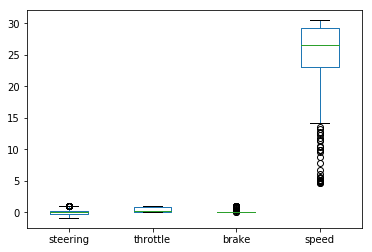

In [38]:
df5.plot(kind='box')

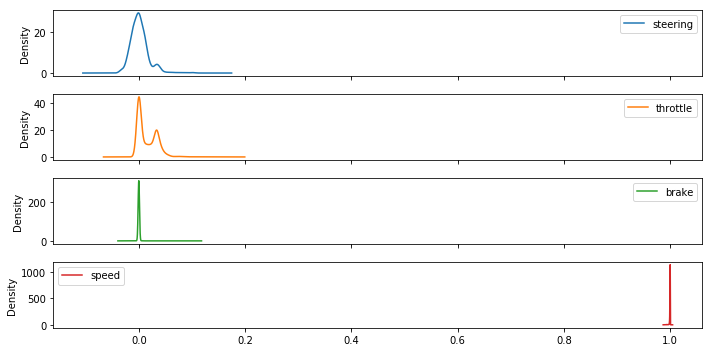

In [39]:
# normalise data
df5_norm = normalize(df5[df5_summary_cols][:])

# put into dataframe for easy charting
df5_norm = pd.DataFrame(df5_norm, columns=df5_summary_cols)

# drop columns with zero mean and zero std.dev
df5_norm = df5_norm.loc[:, (df5_norm.mean() != 0.) & (df5_norm.std() != 0.)]

# plot kde
df5_norm.plot(kind='kde', 
              subplots=True, 
              figsize=(10, 5))
plt.tight_layout()

# Sample Count Summary

In [40]:
track_1_count = df2_count + df3_count
track_2_count = df4_count + df5_count
total_count = df1_count + df2_count + df3_count + df4_count + df5_count

print('source\t\t\t\t\t     n\t  total\t       %')
print('====================================     =====   ======\t  ======\n')
print('sample: total \t\t\t\t{:>6,}\t\t  {:>5.3}%'.format(df1_count, 
                                                           (df1_count / total_count) * 100))
print('----------------------------------------------------------------\n')
print('sim track 1: direction=default \t\t{:>6,}'.format(df2_count))
print('sim track 1: direction=reverse \t\t{:>6,}'.format(df3_count))
print('sim track 1: total \t\t\t\t {:>6,}\t  {:>5.3}%'.format(track_1_count, 
                                                             (track_1_count / total_count) * 100))
print('----------------------------------------------------------------\n')
print('sim track 2: direction=default \t\t{:>6,}'.format(df4_count))
print('sim track 2: direction=reverse \t\t{:>6,}'.format(df5_count))
print('sim track 2: total \t\t\t\t {:>6,}\t  {:>5.3}%'.format(track_2_count, 
                                                    (track_2_count / total_count) * 100))
print('----------------------------------------------------------------\n')
print('totals (x3 for centre + left + right)\t\t {:>6,}\t  100.0%'.format(total_count))
print('================================================================')

source					     n	  total	       %
====================================     =====   ======	  ======

sample: total 				 8,036		   46.4%
----------------------------------------------------------------

sim track 1: direction=default 		 2,719
sim track 1: direction=reverse 		 2,568
sim track 1: total 				  5,287	   30.6%
----------------------------------------------------------------

sim track 2: direction=default 		 2,568
sim track 2: direction=reverse 		 1,412
sim track 2: total 				  3,980	   23.0%
----------------------------------------------------------------

totals (x3 for centre + left + right)		 17,303	  100.0%


# Image inspection

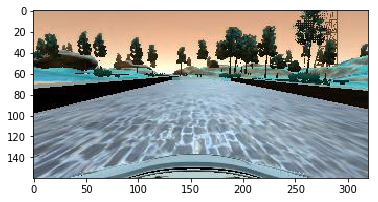

In [51]:
img_path = '/src/repos/udacity_carnd/project_3/data/raw/sample/IMG/center_2016_12_01_13_30_48_287.jpg'

img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [52]:
type(img)

numpy.ndarray

In [53]:
img = img[60:140, :, :]
img.shape

(80, 320, 3)

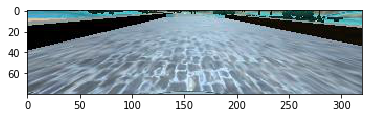

In [54]:
plt.imshow(img)